<a href="https://colab.research.google.com/github/Eri0738/machine_learning/blob/main/%E5%AE%9F%E5%8A%9B%E3%83%86%E3%82%B9%E3%83%88_51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 【実力テスト - 問題 notebook】 分析レポート - マーケティングプロモーションデータの分析

本ノートブックでは、実力テストとして、マーケティングプロモーションのデータの分析のレポーティングを行う。

本レポートは以下の構成である。

- イントロダクションパート
- メインパート
- まとめパート  
  

---



## イントロダクションパート  
イントロダクションは以下の内容について記載する。  

1. 分析が必要になった背景と目的
2. 分析で使用するデータ
3. 分析で設定された課題と分析の結果  

### 1. 分析が必要になった背景と目的

#### 分析が必要になった背景  

分析が必要になった背景は以下である。
マーケティングプロモーションのコンバージョンの有無のデータセットがある。  
次回同様のプロモーションを行う場合には、全顧客に対して行うのではなく、データからコンバージョンの確度の高いユーザーに対してのみプロモーションを打つことを考えている。
**conversionの有無に寄与する要因を特定し、購入促進のための施策を考えること**を分析の具体的な方針とする。 

#### 分析の目的

**自社保有のデータからconversionに寄与している要因を見つけ出し、購買促進のための施策を考えること**を分析の具体的な方針とする。どういったユーザーに対してプロモーション施策を打つことが望ましいか分析、得られた示唆をまとめて報告することを目的とする。報告に際して、本分析レポートを提出する。  







### 2. 今回使用するデータ
分析には、以下のデータを使用する。   

▼ [exercise.csv](https://drive.google.com/drive/u/0/folders/1LyBcmiIJNcclTsWqNA5mcyjlsMiTa2cU)

このデータは、サンプルサイズ 64000、カラム数 9 含まれるデータである。  


データ内の変数は以下のようなものが含まれる。  

|  変数  |  詳細  |
| ---- | ---- |
|  recency  |  前回の購入からの月数  |
|  history  |  過去の購入品の価値  |
|  used_discount  |  以前に割引を利用したかどうか。0:していない、1:した  |
|  used_bogo  |  以前にBuy One Get Oneを利用したかどうか。0:していない、1:した  |
|  zip_code  |  居住郵便番号のカテゴリ。郊外（SUrburban）／都市（Urban）／農村（Rural）  |
|  is_referral  |  顧客がリファラルで流入したかどうか。 0:していない、1:した  |
|  channel  |  顧客が利用している購入チャネル。電話（Phone）／Web／マルチチャネル（Multichannel）  |
|  offer  | 顧客に送られるオファー。割引（Discount）/But One Get One（一つ購入で一つプレゼント）/オファー無し（No Offer）  |
|  conversion  |  顧客のコンバージョン(buy:1 or not:0)  |
　
 なお、historyを量的変数、その他を質的変数として扱う。

### 3. 分析で設定された課題と分析の結果  

本分析では、exercise.csv を使用して、conversionに寄与している要因を見つけ出し、どういったユーザーに対してプロモーション施策を打つことが望ましいか分析を行う。  

データ分析の結論として以下のユーザーに対してプロモーション施策を打つことを提案する。  

- リファラルで流入しなかった顧客
- 以前にBuy One Get One を利用したことがある顧客
- 割引のオファーを送る顧客
- 前回の購入からの月数が3か月以内の顧客



## メインパート

メインパートでは、以下について記載する。  

- データを確認する
 - データの確認
 - 基礎統計量の確認（平均、分散、標準偏差）
- データの比較
 - データの可視化（棒グラフ、ヒストグラム、散布図、 箱ひげ図など、データを俯瞰してみて、特徴を捉える）
 - クロス集計（2 変数を集計・比較し、特徴を捉える）
 - 検定（buy one get one とコンバージョンの差に有意性はあるのかなど）
- 要因の分析
 - 相関係数（どの項目がコンバージョンに影響を与えているのかなど）
 - 重回帰分析（項目全体で見て、どのような影響があるのかなど）
 - 分類手法を使用した係数比較



###データを確認する

####データの確認

In [ ]:
# 環境の準備 
!pip install -q japanize_matplotlib

In [ ]:
# 環境の準備 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 8

In [ ]:
# データの読み込み
import pandas as pd
df = pd.read_csv('exercise.csv')
df.head(2)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####基礎統計量の確認


In [ ]:
# 定性的なデータの確認（代表値の確認）
df.describe(include='all')


,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000,64000.000000,64000,64000,64000.000000
unique,NaN,NaN,NaN,NaN,3,NaN,3,3,NaN
top,NaN,NaN,NaN,NaN,Surburban,NaN,Web,Buy One Get One,NaN
freq,NaN,NaN,NaN,NaN,28776,NaN,28217,21387,NaN
mean,5.763734,242.085656,0.551031,0.549719,NaN,0.502250,NaN,NaN,0.146781
std,3.507592,256.158608,0.497393,0.497526,NaN,0.499999,NaN,NaN,0.353890
min,1.000000,29.990000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,2.000000,64.660000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
50%,6.000000,158.110000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
75%,9.000000,325.657500,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000


In [ ]:
#データの型や欠損値の有無を確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


###データの比較



####データの可視化

In [ ]:
!pip install -q japanize_matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

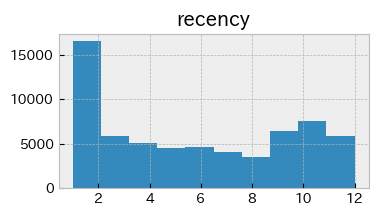

In [ ]:
plt.rcParams['figure.figsize'] = 4, 2
df['recency'].hist();
plt.title('recency');

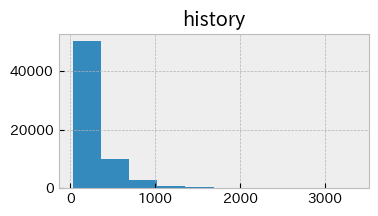

In [ ]:
plt.rcParams['figure.figsize'] = 4, 2
df['history'].hist();
plt.title('history');

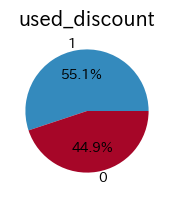

In [ ]:
x = df['used_discount'].value_counts()
plt.rcParams['figure.figsize'] = 4, 2
plt.title('used_discount') # タイトルの表示  
plt.pie(x, labels=x.index, autopct='%.1f%%');

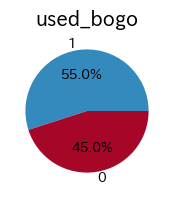

In [ ]:
x = df['used_bogo'].value_counts()
plt.rcParams['figure.figsize'] = 4, 2
plt.title('used_bogo') # タイトルの表示  
plt.pie(x, labels=x.index, autopct='%.1f%%');

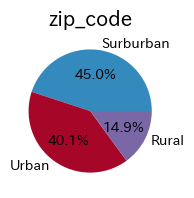

In [ ]:
x = df['zip_code'].value_counts()
plt.rcParams['figure.figsize'] = 4, 2
plt.title('zip_code') # タイトルの表示  
plt.pie(x, labels=x.index, autopct='%.1f%%');

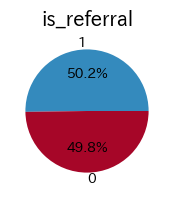

In [ ]:
x = df['is_referral'].value_counts()
plt.rcParams['figure.figsize'] = 4, 2
plt.title('is_referral') # タイトルの表示  
plt.pie(x, labels=x.index, autopct='%.1f%%');

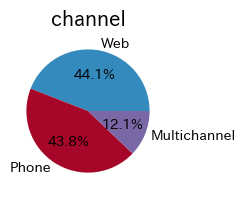

In [ ]:
x = df['channel'].value_counts()
plt.rcParams['figure.figsize'] = 4, 2
plt.title('channel') # タイトルの表示  
plt.pie(x, labels=x.index, autopct='%.1f%%');

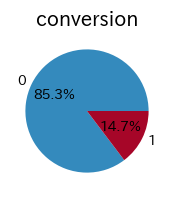

In [ ]:
x = df['conversion'].value_counts()
plt.rcParams['figure.figsize'] = 4, 2
plt.title('conversion') # タイトルの表示  
plt.pie(x, labels=x.index, autopct='%.1f%%');

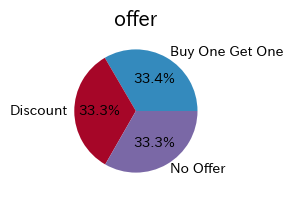

In [ ]:
x = df['offer'].value_counts()
plt.rcParams['figure.figsize'] = 4, 2
plt.title('offer') # タイトルの表示  
plt.pie(x, labels=x.index, autopct='%.1f%%');

- データの特徴
 - コンバージョンは顧客全体の約15%が購入

####クロス集計

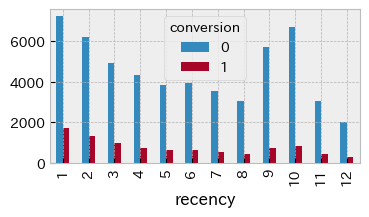

In [ ]:
#conversion と　recencyのクロス集計
crosstab = pd.crosstab(df['recency'], df['conversion'])
crosstab.plot.bar();

In [ ]:
group = df.groupby('recency')
group.mean()

,history,used_discount,used_bogo,is_referral,conversion
recency,,,,,
1,359.844955,0.572498,0.578195,0.554178,0.193029
2,310.990777,0.574764,0.555924,0.532440,0.177790
3,274.462007,0.557419,0.560976,0.518631,0.166328
4,251.310701,0.545007,0.559779,0.508568,0.148907
5,233.153233,0.549446,0.554545,0.490022,0.142350
6,218.387238,0.558523,0.538111,0.479045,0.140717
7,207.557580,0.553948,0.531633,0.480873,0.133889
8,194.924066,0.551645,0.529900,0.483548,0.127897
9,185.874574,0.534389,0.536563,0.478031,0.113957


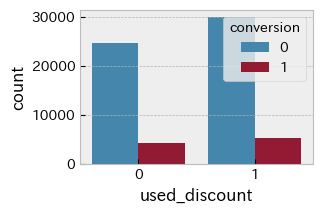

In [ ]:
#conversion と used_discountのクロス集計
plt.figure(figsize=(3,2))
sns.countplot(x="used_discount", hue="conversion", data=df)
plt.show()

In [ ]:
group = df.groupby('used_discount')
group.mean()

,recency,history,used_bogo,is_referral,conversion
used_discount,,,,,
0,5.885501,210.109902,1.000000,0.490673,0.144150
1,5.664521,268.138832,0.182839,0.511683,0.148925


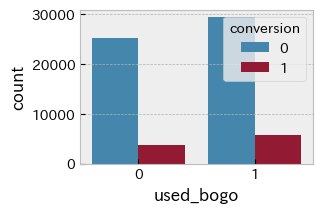

In [ ]:
#conversion と used_bogoのクロス集計
plt.figure(figsize=(3,2))
sns.countplot(x="used_bogo", hue="conversion", data=df)
plt.show()

In [ ]:
group = df.groupby('used_bogo')
group.mean()

,recency,history,used_discount,is_referral,conversion
used_bogo,,,,,
0,5.866889,209.626353,1.000000,0.490457,0.126449
1,5.679239,268.673462,0.183276,0.511909,0.163436


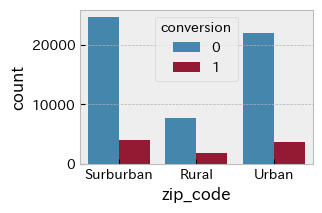

In [ ]:
#conversion と zip_code
plt.figure(figsize=(3,2))
sns.countplot(x="zip_code", hue="conversion", data=df)
plt.show()

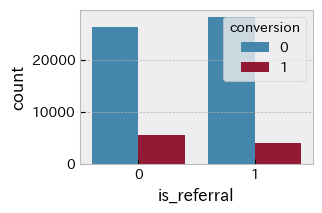

In [ ]:
#conversion と is_referralのクロス集計
plt.figure(figsize=(3,2))
sns.countplot(x="is_referral", hue="conversion", data=df)
plt.show()

In [ ]:
group = df.groupby('is_referral')
group.mean()

,recency,history,used_discount,used_bogo,conversion
is_referral,,,,,
0,5.947325,184.633287,0.540589,0.539051,0.173060
1,5.581788,299.023269,0.561380,0.560291,0.120738


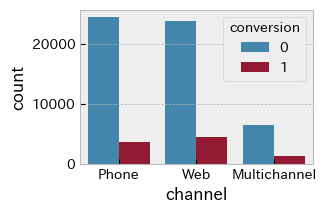

In [ ]:
#conversion と channelのクロス集計
plt.figure(figsize=(3,2))
sns.countplot(x="channel", hue="conversion", data=df)
plt.show()

In [ ]:
group = df.groupby('channel')
group.mean()

,recency,history,used_discount,used_bogo,is_referral,conversion
channel,,,,,,
Multichannel,4.768488,520.970370,0.632698,0.624195,0.595723,0.171734
Phone,5.897541,202.807184,0.539203,0.538953,0.493309,0.127155
Web,5.904632,204.375017,0.540313,0.539923,0.485417,0.159407


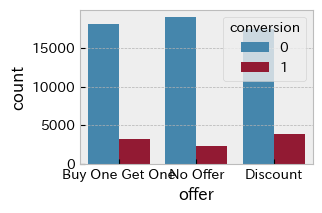

In [ ]:
#conversion と offerのクロス集計
plt.figure(figsize=(3,2))
sns.countplot(x="offer", hue="conversion", data=df)
plt.show()

In [ ]:
group = df.groupby('offer')
group.mean()

,recency,history,used_discount,used_bogo,is_referral,conversion
offer,,,,,,
Buy One Get One,5.767850,242.536633,0.548932,0.550101,0.503250,0.151400
Discount,5.773642,242.835931,0.550946,0.551415,0.501525,0.182757
No Offer,5.749695,240.882653,0.553224,0.547639,0.501971,0.106167


####検定

In [ ]:
#conversion と used_discountのχ二乗検定
group = df.groupby('used_discount')
group.mean()

,recency,history,used_bogo,is_referral,conversion
used_discount,,,,,
0,5.885501,210.109902,1.000000,0.490673,0.144150
1,5.664521,268.138832,0.182839,0.511683,0.148925


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')
#conversionとused_discountには有意差なし

χ 二乗値:398.60559077634184
p 値:1.2098080358777079e-78
自由度:11


In [ ]:
#conversion と used_bogoのχ二乗検定
group = df.groupby('used_bogo')
group.mean()

,recency,history,used_discount,is_referral,conversion
used_bogo,,,,,
0,5.866889,209.626353,1.000000,0.490457,0.126449
1,5.679239,268.673462,0.183276,0.511909,0.163436


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')
#conversionとused_bogoには有意差あり

χ 二乗値:398.60559077634184
p 値:1.2098080358777079e-78
自由度:11


In [ ]:
#conversion と is_referralのχ二乗検定
group = df.groupby('is_referral')
group.mean()

,recency,history,used_discount,used_bogo,conversion
is_referral,,,,,
0,5.947325,184.633287,0.540589,0.539051,0.173060
1,5.581788,299.023269,0.561380,0.560291,0.120738


In [ ]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')
#conversionとis_referralには有意差あり

χ 二乗値:398.60559077634184
p 値:1.2098080358777079e-78
自由度:11


In [ ]:
#conversion と zip_codeの平均値の比較
group = df.groupby('zip_code')
group['conversion'].agg(['mean', 'median'])

,mean,median
zip_code,,
Rural,0.188121,0.0
Surburban,0.139943,0.0
Urban,0.139044,0.0


In [ ]:
group1 = group.get_group('Rural')
group2 = group.get_group('Surburban')
group3 = group.get_group('Urban')
print(stats.kstest(group1['conversion'],"norm"))#正規分布を仮定できない
print(stats.kstest(group2['conversion'],"norm"))#正規分布を仮定できない
print(stats.kstest(group3['conversion'],"norm"))#正規分布を仮定できない

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)


In [ ]:
#田舎と郊外のコンバージョン
print(stats.mannwhitneyu(group1['conversion'], group2['conversion'], alternative='two-sided'))#有意差あり
#田舎と都市のコンバージョン
print(stats.mannwhitneyu(group1['conversion'], group3['conversion'], alternative='two-sided'))#有意差あり
#郊外と都市のコンバージョン
print(stats.mannwhitneyu(group3['conversion'], group2['conversion'], alternative='two-sided'))#有意差なし

MannwhitneyuResult(statistic=144221355.5, pvalue=5.898063169048251e-30)
MannwhitneyuResult(statistic=128719749.0, pvalue=4.2664710427948106e-30)
MannwhitneyuResult(statistic=368878428.5, pvalue=0.7624284486573925)


In [ ]:
#conversion と channelの平均値の比較
group = df.groupby('channel')
group['conversion'].agg(['mean', 'median'])

,mean,median
channel,,
Multichannel,0.171734,0.0
Phone,0.127155,0.0
Web,0.159407,0.0


In [ ]:
group1 = group.get_group('Multichannel')
group2 = group.get_group('Phone')
group3 = group.get_group('Web')
print(stats.kstest(group1['conversion'],"norm"))#正規性を仮定できない
print(stats.kstest(group2['conversion'],"norm"))#正規性を仮定できない
print(stats.kstest(group3['conversion'],"norm"))#正規性を仮定できない

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)


In [ ]:
#マルチチャンネと電話のコンバージョン
print(stats.mannwhitneyu(group1['conversion'], group2['conversion'], alternative='two-sided'))#有意差あり
#マルチチャンネルとWebのコンバージョン
print(stats.mannwhitneyu(group1['conversion'], group3['conversion'], alternative='two-sided'))#有意差あり
#Webと電話のコンバージョン
print(stats.mannwhitneyu(group2['conversion'], group3['conversion'], alternative='two-sided'))#有意差あり

MannwhitneyuResult(statistic=113597494.5, pvalue=4.829837921641575e-24)
MannwhitneyuResult(statistic=110860069.5, pvalue=0.009059948570440056)
MannwhitneyuResult(statistic=382583635.0, pvalue=9.942373460873007e-28)


In [ ]:
#conversion と offerの平均値の比較
group = df.groupby('offer')
group['conversion'].agg(['mean', 'median'])

,mean,median
offer,,
Buy One Get One,0.151400,0.0
Discount,0.182757,0.0
No Offer,0.106167,0.0


In [ ]:
group1 = group.get_group('Buy One Get One')
group2 = group.get_group('Discount')
group3 = group.get_group('No Offer')
print(stats.kstest(group1['conversion'],"norm"))#正規性を仮定できない
print(stats.kstest(group2['conversion'],"norm"))#正規性を仮定できない
print(stats.kstest(group3['conversion'],"norm"))#正規性を仮定できない

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)


In [ ]:
# 割引とbogoのコンバージョン
print(stats.mannwhitneyu(group1['conversion'], group2['conversion'], alternative='two-sided'))#有意差あり
# bogoとオファーなしのコンバージョン
print(stats.mannwhitneyu(group1['conversion'], group3['conversion'], alternative='two-sided'))#有意差あり
#割引とオファーなしのコンバージョン
print(stats.mannwhitneyu(group3['conversion'], group2['conversion'], alternative='two-sided'))#有意差あり

MannwhitneyuResult(statistic=220701948.5, pvalue=3.805588886834237e-18)
MannwhitneyuResult(statistic=238141428.0, pvalue=3.189730811153595e-44)
MannwhitneyuResult(statistic=209598906.0, pvalue=5.7191444020971605e-112)


In [ ]:
# conversion と recencyのクロス集計（recencyを質的関数とみる）
group = df.groupby('recency')
group['conversion'].agg(['mean', 'median'])

,mean,median
recency,,
1,0.193029,0.0
2,0.177790,0.0
3,0.166328,0.0
4,0.148907,0.0
5,0.142350,0.0
6,0.140717,0.0
7,0.133889,0.0
8,0.127897,0.0
9,0.113957,0.0


In [ ]:
# 関数化しておく
crosstab = pd.crosstab(df['conversion'], df['recency'])
crosstab
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction=False)
print(f'χ 二乗値:{chi2}')
print(f'p 値:{p}')
print(f'自由度:{dof}')

χ 二乗値:398.60559077634184
p 値:1.2098080358777079e-78
自由度:11


In [ ]:
#前回の購入からの月数3か月以下/4か月以上でグルーピング
satis_0 = df.query('recency<=3')
satis_1 = df.query('recency>=4')
print(f'recency3以下：{satis_0["conversion"].mean()}')
print(f'recency4以上：{satis_1["conversion"].mean()}')

recency3以下：0.18086009020676105
recency4以上：0.12843992597399476


In [ ]:
print(stats.kstest(satis_0['conversion'], "norm"))
print(stats.kstest(satis_1['conversion'], "norm"))#正規性を仮定できない

KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0, statistic_sign=-1)


In [ ]:
stats.mannwhitneyu(satis_0['conversion'], satis_1['conversion'], alternative='two-sided')#有意差あり

MannwhitneyuResult(statistic=490272854.5, pvalue=1.9406444072063278e-71)

In [ ]:
#conversion と recency 平均値の比較
group = df.groupby('conversion')
group['recency'].agg(['mean', 'median'])

,mean,median
conversion,,
0,5.872505,6.0
1,5.131467,4.0


In [ ]:
group1 = group.get_group(0)
group2 = group.get_group(1)
# コルモゴロフ・スミルノフ検定
print(stats.kstest(group1['recency'],"norm"))
print(stats.kstest(group2['recency'],"norm"))#正規性を仮定できない

KstestResult(statistic=0.844956713453425, pvalue=0.0, statistic_location=2, statistic_sign=-1)
KstestResult(statistic=0.8413447460685429, pvalue=0.0, statistic_location=1, statistic_sign=-1)


In [ ]:
stats.mannwhitneyu(group1['recency'], group2['recency'], alternative='two-sided')#有意差あり

MannwhitneyuResult(statistic=287976211.5, pvalue=1.3651156524174674e-81)

In [ ]:
#conversion と history 平均値の比較
group = df.groupby('conversion')
group['history'].agg(['mean', 'median'])

,mean,median
conversion,,
0,235.163403,151.835
1,282.323739,202.460


In [ ]:
group1 = group.get_group(0)
group2 = group.get_group(1)
# コルモゴロフ・スミルノフ検定
print(stats.kstest(group1['history'],"norm"))
print(stats.kstest(group2['history'],"norm"))#正規性を仮定できない

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=29.99, statistic_sign=-1)


In [ ]:
stats.mannwhitneyu(group1['history'], group2['history'], alternative='two-sided')#有意差あり

MannwhitneyuResult(statistic=227167236.0, pvalue=2.006166505322324e-70)

###要因の分析



####相関係数

In [ ]:
# 相関分析
_df = pd.get_dummies(df)
_df.corr(method='spearman')


,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
recency,1.000000,-0.225969,-0.031600,-0.026927,-0.053183,-0.075627,-0.004255,0.010275,-0.007335,-0.106941,0.033931,0.036411,0.000889,0.001748,-0.002638
history,-0.225969,1.000000,0.111903,0.112334,0.095369,0.070130,0.002699,-0.008465,0.006629,0.418909,-0.138917,-0.136628,0.003488,-0.002354,-0.001137
used_discount,-0.031600,0.111903,1.000000,-0.816943,0.020900,0.006712,0.000836,-0.003630,0.003076,0.060999,-0.020987,-0.019136,-0.002991,-0.000122,0.003115
used_bogo,-0.026927,0.112334,-0.816943,1.000000,0.021346,0.051999,-0.001846,0.000713,0.000619,0.055613,-0.019096,-0.017485,0.000544,0.002409,-0.002953
is_referral,-0.053183,0.095369,0.020900,0.021346,1.000000,-0.073924,-0.004735,0.002026,0.001388,0.069453,-0.015782,-0.029897,0.001416,-0.001024,-0.000394
conversion,-0.075627,0.070130,0.006712,0.051999,-0.073924,1.000000,0.048961,-0.017465,-0.017888,0.026195,-0.048944,0.031683,0.009247,0.071817,-0.081073
zip_code_Rural,-0.004255,0.002699,0.000836,-0.001846,-0.004735,0.048961,1.000000,-0.378831,-0.342899,-0.004003,0.000711,0.001921,-0.001365,0.005512,-0.004146
zip_code_Surburban,0.010275,-0.008465,-0.003630,0.000713,0.002026,-0.017465,-0.378831,1.000000,-0.739456,-0.002404,-0.004935,0.006512,0.002255,-0.005276,0.003019
zip_code_Urban,-0.007335,0.006629,0.003076,0.000619,0.001388,-0.017888,-0.342899,-0.739456,1.000000,0.005352,0.004491,-0.008007,-0.001297,0.001346,-0.000048
channel_Multichannel,-0.106941,0.418909,0.060999,0.055613,0.069453,0.026195,-0.004003,-0.002404,0.005352,1.000000,-0.327861,-0.329905,-0.001506,-0.000725,0.002233


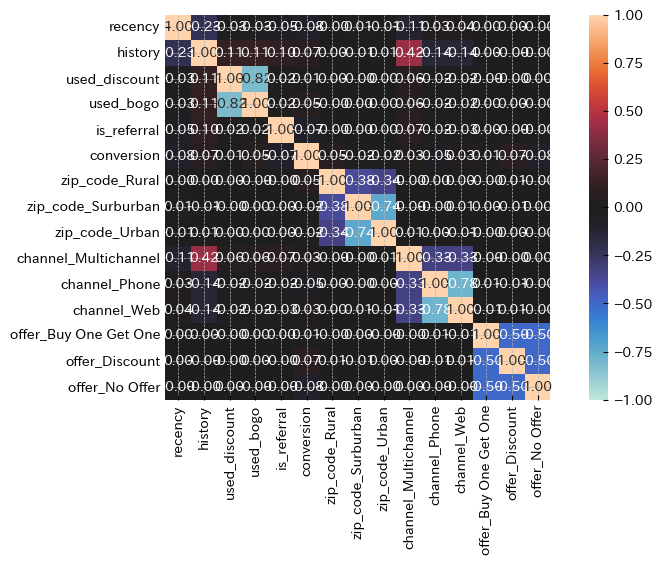

In [ ]:
# `conversion`との相関が高い変数を確認する  
plt.rcParams['figure.figsize'] = 10, 5
sns.heatmap(_df.corr('spearman'), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');
#相関の大きさはrecencyとoffer_No Offer_, historyとis_referralとused_discount, used_bogoとzip_code_Ruralとchannel_Phoneの順

#### 重回帰分析

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# 変数の選択: 目的変数→conversion、入力変数→conversion以外の数値データ  
x = _df.drop('conversion', axis=1)
y = _df['conversion']
x.head(2)

,recency,history,used_discount,used_bogo,is_referral,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,0,1,0,0,1,0,1,0,0
1,6,329.08,1,1,1,1,0,0,0,0,1,0,0,1


In [ ]:
# 変数の標準化  
x_scaled = scaler.fit_transform(x)
feature = pd.DataFrame(x_scaled, columns=_df.drop('conversion', axis=1).columns)
feature.head(2)

,recency,history,used_discount,used_bogo,is_referral,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
0,1.207751,-0.389003,0.902651,-1.104914,-1.00451,-0.419131,1.106380,-0.818119,-0.371511,1.133138,-0.888008,1.411550,-0.706452,-0.706427
1,0.067359,0.339614,0.902651,0.905048,0.99551,2.385888,-0.903849,-0.818119,-0.371511,-0.882505,1.126116,-0.708441,-0.706452,1.415574


In [ ]:
# 重回帰分析を実行  
np.random.seed(0) # 乱数の固定
np.random.seed(0)
multi_ols = sm.OLS(y, sm.add_constant(feature))
result = multi_ols.fit()

In [ ]:
# 分析結果の表示   
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             conversion   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     207.7
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        11:09:03   Log-Likelihood:                -23208.
No. Observations:               64000   AIC:                         4.644e+04
Df Residuals:                   63988   BIC:                         4.655e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1468      0.001    106.775      0.000       0.144       0.149
recency                  -0.0220      0.001    -15.540      0.000      -0.025      -0.019
history                   0.0145      0.002      8.706      0.000       0.011       0.018
used_discount             0.0442      0.003     17.268      0.000       0.039       0.049
used_bogo                 0.0530      0.003     20.703      0.000       0.048       0.058
is_referral              -0.0323      0.001    -22.860      0.000      -0.035      -0.029
zip_code_Rural            0.0135      0.001     12.332      0.000       0.011       0.016
zip_code_Surburban       -0.0044      0.001     -5.377      0.000      -0.006      -0.003
zip_code_Urban           -0.0053      0.001     -6.241      0.000      -0.007      -0.004
channel_Multichannel     -0.0018      0.001     -1.444      0.149      -0.004       0.001
channel_Phone            -0.0072      0.001     -8.582      0.000      -0.009      -0.006
channel_Web               0.0083      0.001     10.007      0.000       0.007       0.010
offer_Buy One Get One     0.0023      0.001      2.565      0.010       0.001       0.004
offer_Discount            0.0167      0.001     18.255      0.000       0.015       0.019
offer_No Offer           -0.0191      0.001    -20.820      0.000      -0.021      -0.017
==============================================================================
Omnibus:                    20397.703   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47287.860
Skew:                           1.892   Prob(JB):                         0.00
Kurtosis:                       4.849   Cond. No.                     7.29e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
result.rsquared_adj#自由度調整済み決定係数

0.034301038563986586

In [ ]:
# 説明変数とt,p値, 標準偏回帰係数のデータフレームを作成
res_values = pd.DataFrame([result.tvalues[1:], result.pvalues[1:], result.params[1:]],
                          index=['t', 'p', 'coef']).T
res_values

,t,p,coef
recency,-15.539503,2.356951e-54,-0.022044
history,8.706340,3.211528e-18,0.014495
used_discount,17.267692,1.167268e-66,0.044176
used_bogo,20.703281,6.633969e-95,0.052972
is_referral,-22.860347,3.346009e-115,-0.032253
zip_code_Rural,12.332145,6.662593e-35,0.013450
zip_code_Surburban,-5.377037,7.598622e-08,-0.004444
zip_code_Urban,-6.241217,4.368902e-10,-0.005273
channel_Multichannel,-1.443760,1.488114e-01,-0.001787
channel_Phone,-8.581673,9.555896e-18,-0.007166


In [ ]:
# 条件抽出
# t値の絶対値が10以上かつp値が5%以下
res_values[(res_values['t'].abs()>=15.0)&(res_values['p']<0.05)].sort_values('t', ascending=False)

,t,p,coef
used_bogo,20.703281,6.633969e-95,0.052972
offer_Discount,18.255100,2.911645e-74,0.016736
used_discount,17.267692,1.167268e-66,0.044176
recency,-15.539503,2.356951e-54,-0.022044
offer_No Offer,-20.820146,5.924729e-96,-0.019087
is_referral,-22.860347,3.346009e-115,-0.032253


- 重回帰分析の結果から、is_referral, used_bogo, offer_No Offer, offer_Discount, used_discount, recency の順に conversion への影響が大きそう。
- 検定結果から、offer_No Offer, used_discount が conversion に正の影響を与えているということは確認できなかった。
- 以上より、リファラルで流入しなかった顧客、以前にBuy One Get One を利用したことがある顧客、割引のオファーを送る顧客、前回の購入からの月数が3か月以内の顧客にプロモーションを打つことが望ましいと考える。

####分類手法を使用した係数比較

In [ ]:
# 相関関係と比較
tmp = df.corr()['conversion']
tmp
#recency, history, used_bogo, is_referralが関係していそう

recency         -0.074765
history          0.065153
used_discount    0.006712
used_bogo        0.051999
is_referral     -0.073924
conversion       1.000000
Name: conversion, dtype: float64

## まとめパート  

本分析では、exercise.csv を使用して、conversionに寄与している要因を見つけ出し、どういったユーザーに対してプロモーション施策を打つことが望ましいか分析を行った。

データ分析の結論として以下のユーザーに対してプロモーション施策を打つことを提案する。  

- リファラルで流入しなかった顧客
- 以前にBuy One Get One を利用したことがある顧客
- 割引のオファーを送る顧客
- 前回の購入からの月数が3か月以内の顧客
